In [1]:
import pandas as pd
import numpy as np
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
df = pd.read_csv("/Users/tramy/Documents/Github2/bigco/data/interim/employee_reviews_tokenized_filtered.csv")

In [3]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,...,helpful-count,link,summary_clean,pros_clean,cons_clean,advice_clean,summary_filtered,pros_filtered,cons_filtered,advice_filtered
0,0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,"['best', 'company', 'to', 'work', 'for']","['people', 'are', 'smart', 'and', 'friendly']","['bureaucracy', 'is', 'slowing', 'things', 'do...",['none'],...,0,https://www.glassdoor.com/Reviews/Google-Revie...,"['best', 'company', 'to', 'work', 'for']","['people', 'are', 'smart', 'and', 'friendly']","['bureaucracy', 'is', 'slowing', 'things', 'do...",['none'],"['best', 'company', 'work']","['people', 'smart', 'friendly']","['bureaucracy', 'slowing', 'things']",['none']
1,1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"['moving', 'at', 'the', 'speed', 'of', 'light,...","['1)', 'food,', 'food,', 'food.', '15+', 'cafe...","['1)', 'work/life', 'balance.', 'what', 'balan...","['1)', ""don't"", 'dismiss', 'emotional', 'intel...",...,2094,https://www.glassdoor.com/Reviews/Google-Revie...,"['moving', 'at', 'the', 'speed', 'of', 'burn',...","['cafes', 'on', 'main', 'campus', 'free', 'all...","['what', 'all', 'those', 'perks', 'and', 'bene...","['dismiss', 'emotional', 'intelligence', 'and'...","['moving', 'speed', 'burn', 'inevitable']","['cafes', 'main', 'campus', 'free', 'free', 'g...","['perks', 'benefits', 'keep', 'work', 'help', ...","['dismiss', 'emotional', 'intelligence', 'adap..."
2,2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,"['great', 'balance', 'between', 'big-company',...","['*', 'if', ""you're"", 'a', 'software', 'engine...","['*', 'it', '*is*', 'becoming', 'larger,', 'an...","['keep', 'the', 'focus', 'on', 'the', 'user.',...",...,949,https://www.glassdoor.com/Reviews/Google-Revie...,"['great', 'balance', 'between', 'security', 'a...","['if', 'a', 'software', 'among', 'the', 'kings...","['it', 'becoming', 'and', 'with', 'it', 'comes...","['keep', 'the', 'focus', 'on', 'the', 'everyth...","['great', 'balance', 'security', 'projects']","['software', 'among', 'kings', 'hill', 'compan...","['becoming', 'comes', 'growing', 'slow', 'resp...","['keep', 'focus', 'everything', 'else']"
3,3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,"['the', 'best', 'place', ""i've"", 'worked', 'an...","['you', ""can't"", 'find', 'a', 'more', 'well-re...","['i', 'live', 'in', 'sf', 'so', 'the', 'commut...","['keep', 'on', 'not', 'micromanaging', '-', 't...",...,498,https://www.glassdoor.com/Reviews/Google-Revie...,"['the', 'best', 'place', 'worked', 'and', 'als...","['you', 'find', 'a', 'more', 'company', 'that'...","['i', 'live', 'in', 'sf', 'so', 'the', 'commut...","['keep', 'on', 'not', 'micromanaging', 'that',...","['best', 'place', 'worked', 'also']","['find', 'company', 'actually', 'deserves', 'h...","['live', 'sf', 'commute', 'take', 'hours', 'ho...","['keep', 'micromanaging', 'huge', 'benefit', '..."
4,4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"['unique,', 'one', 'of', 'a', 'kind', 'dream',...","['google', 'is', 'a', 'world', 'of', 'its', 'o...","['if', 'you', ""don't"", 'work', 'in', 'mtv', '(...","['promote', 'managers', 'into', 'management', ...",...,49,https://www.glassdoor.com/Reviews/Google-Revie...,"['one', 'of', 'a', 'kind', 'dream', 'job']","['google', 'is', 'a', 'world', 'of', 'its', 'a...","['if', 'you', 'work', 'in', 'mtv', 'you', 'wil...","['promote', 'managers', 'into', 'management', ...","['one', 'kind', 'dream', 'job']","['google', 'world', 'every', 'lots', 'people',...","['work', 'mtv', 'given', 'however', 'passionat...","['promote', 'managers', 'management', 'manager..."


In [6]:
# Select all comments about Google
df['google_summary_review'] = df['summary_filtered']
df.loc[df['company'] == 'google', 'google_summary_review'] = df['summary_filtered']
df.loc[df['company'] != 'google', 'google_summary_review'] = ''

df['google_pros_review'] = df['pros_filtered']
df.loc[df['company'] == 'google', 'google_pros_review'] = df['pros_filtered']
df.loc[df['company'] != 'google', 'google_pros_review'] = ''

df['google_cons_review'] = df['cons_filtered']
df.loc[df['company'] == 'google', 'google_cons_review'] = df['cons_filtered']
df.loc[df['company'] != 'google', 'google_cons_review'] = ''

df['google_advice'] = df['advice_filtered']
df.loc[df['company'] == 'google', 'google_advice'] = df['cons_filtered']
df.loc[df['company'] != 'google', 'google_advice'] = ''

In [7]:
google_summary_review = [items for items in df['google_summary_review'] if items != '']
google_pros_review =  [items for items in df['google_pros_review'] if items != '']
google_cons_review =  [items for items in df['google_cons_review'] if items != '']
google_advice =  [items for items in df['google_advice'] if items != '']

In [8]:
# Google_summary
# Calculate TF-IDF for all keywords in Google_summary
tfidf_vectorizer = TfidfVectorizer()
tfidf_score_summary = tfidf_vectorizer.fit_transform(google_summary_review)

# Show the Model as a pandas DataFrame
word_list_summary = tfidf_vectorizer.get_feature_names()
google_summary = pd.DataFrame(tfidf_score_summary.toarray(), columns = word_list_summary)

In [9]:
# Google_pros
# Calculate TF-IDF for all keywords in Google_pros
tfidf_vectorizer = TfidfVectorizer()
tfidf_score_pros = tfidf_vectorizer.fit_transform(google_pros_review)

# Show the Model as a pandas DataFrame
word_list_pros = tfidf_vectorizer.get_feature_names()
google_pros = pd.DataFrame(tfidf_score_pros.toarray(), columns = word_list_pros)

In [11]:
# Google_cons
# Calculate TF-IDF for all keywords in Google_cons
tfidf_vectorizer = TfidfVectorizer()
tfidf_score_cons = tfidf_vectorizer.fit_transform(google_cons_review)

# Show the Model as a pandas DataFrame
word_list_cons = tfidf_vectorizer.get_feature_names()
google_cons = pd.DataFrame(tfidf_score_cons.toarray(), columns = word_list_cons)

In [12]:
# Google_advice
# Calculate TF-IDF for all keywords in Google_cons
tfidf_vectorizer = TfidfVectorizer()
tfidf_score_advice = tfidf_vectorizer.fit_transform(google_advice)

# Show the Model as a pandas DataFrame
word_list_advice = tfidf_vectorizer.get_feature_names()
google_advice = pd.DataFrame(tfidf_score_advice.toarray(), columns = word_list_advice)

In [13]:
# Calculate the scores for each words
google_summary_score = google_summary.sum()
google_pros_score = google_pros.sum()
google_cons_score = google_cons.sum()
google_advice_score = google_advice.sum()

In [15]:
# Create a dictionary with keywords and their weights
dict_summary = {}
for i in range(0,len(google_summary_score)):
    dict1 = {word_list_summary[i] : google_summary_score[i]}
    dict_summary.update(dict1)
    
dict_pros = {}
for i in range(0,len(google_pros_score)):
    dict2 = {word_list_pros[i] : google_pros_score[i]}
    dict_pros.update(dict2)
    
dict_cons = {}
for i in range(0,len(google_pros_score)):
    dict3 = {word_list_cons[i] : google_cons_score[i]}
    dict_cons.update(dict3)    

dict_advice = {}
for i in range(0,len(google_pros_score)):
    dict4 = {word_list_advice[i] : google_advice_score[i]}
    dict_advice.update(dict4)  
        

In [16]:
import operator
sorted_summary_dict = sorted(dict_summary.items(), key=operator.itemgetter(1), reverse=True)
sorted_pros_dict = sorted(dict_pros.items(), key=operator.itemgetter(1), reverse=True)
sorted_cons_dict = sorted(dict_cons.items(), key=operator.itemgetter(1), reverse=True)
sorted_advice_dict = sorted(dict_advice.items(), key=operator.itemgetter(1), reverse=True)

In [17]:
top_summary_review = dict(sorted_summary_dict[:40])
top_pros_review = dict(sorted_pros_dict[:40])
top_cons_review = dict(sorted_cons_dict[:40])
top_advice = dict(sorted_advice_dict[:40])

In [18]:
# Plot word clouds
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Google's summary of general review


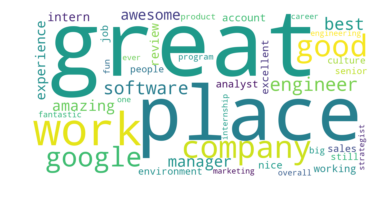

In [21]:
# Plot a word cloud for Google_summary_review
print ('Google\'s summary of general review')
wordcloud = WordCloud(width=1600,height=800, background_color= "white").generate_from_frequencies(top_summary_review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Google's summary of positive review


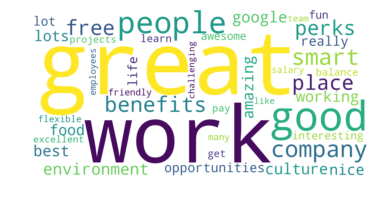

In [22]:
# Plot a word cloud for Google_pros_review
print ('Google\'s summary of positive review')
wordcloud = WordCloud(width=1600,height=800, background_color= "white").generate_from_frequencies(top_pros_review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Google's summary of negative review


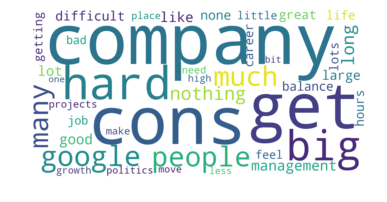

In [23]:
# Plot a word cloud for Google_cons_review
print ('Google\'s summary of negative review')
wordcloud = WordCloud(width=1600,height=800, background_color= "white").generate_from_frequencies(top_cons_review)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Google's summary of employeess' advice to management


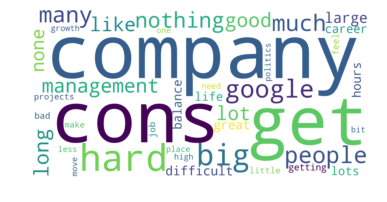

In [24]:
# Plot a word cloud for Google_advice_to_management
print ('Google\'s summary of employeess\' advice to management')
wordcloud = WordCloud(width=1600,height=800, background_color= "white").generate_from_frequencies(top_advice)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:

# Save the image in the img folder:
wordcloud.to_file("img/google_summary_review.png")

https://stackoverflow.com/questions/55738924/generate-word-cloud-for-a-pre-defined-weight

In [ ]:
df.google_summary_review